# Generate normally distributed scenarios

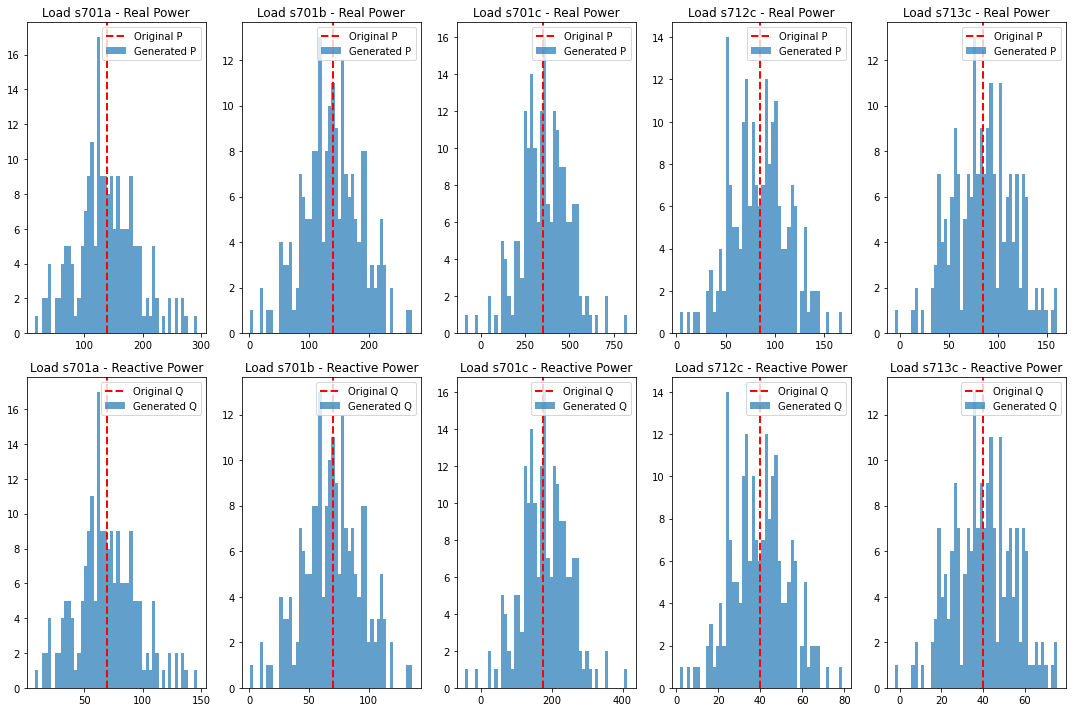

Scenarios saved to results


In [9]:
import numpy as np
from opendssdirect import dss
import os
import matplotlib.pyplot as plt

class LoadScenarioGeneration:
    def __init__(self, dss_file, output_dir="results"):
        self.dss_file = dss_file
        self.output_dir = output_dir
        self.load_data = []
        self.bus_names = []
        self.P_scenarios = {}
        self.Q_scenarios = {}
        os.makedirs(self.output_dir, exist_ok=True)

    def load_system(self):
        """Loads the DSS file and solves the power flow."""
        dss.run_command(f'Redirect "{self.dss_file}"')
        dss.Solution.Solve()

    def extract_load_data(self):
        """Extracts load data from the DSS file and stores it in a structured format."""
        loads = dss.Loads.AllNames()
        for load in loads:
            dss.Loads.Name(load)
            bus = dss.CktElement.BusNames()[0]
            phases = dss.Loads.Phases()
            conn = 'Delta' if dss.Loads.IsDelta() else 'Wye'
            P = dss.Loads.kW()
            Q = dss.Loads.kvar()
            kV = dss.Loads.kV()

            S = np.sqrt(P**2 + Q**2)  # Apparent power
            power_factor = P / S  # Power factor

            self.load_data.append({
                'name': load,
                'bus': bus,
                'phases': phases,
                'connection': conn,
                'P': P,
                'Q': Q,
                'kV': kV,
                'power_factor': power_factor
            })
        self.bus_names = dss.Circuit.AllBusNames()

    def generate_scenarios(self, n_scenarios=200, std_dev=0.35):
        """Generates random load scenarios based on a normal distribution."""
        for load in self.load_data:
            P_base = load['P']
            power_factor = load['power_factor']

            self.P_scenarios[load['name']] = np.random.normal(P_base, P_base * std_dev, n_scenarios)
            self.Q_scenarios[load['name']] = self.P_scenarios[load['name']] * np.tan(np.arccos(power_factor))

    def save_scenarios(self, test_case):
        """Saves the generated load scenarios to the output directory."""
        np.save(os.path.join(self.output_dir, f"P_OpenDSS_normal_{test_case}.npy"), self.P_scenarios)
        np.save(os.path.join(self.output_dir, f"Q_OpenDSS_normal_{test_case}.npy"), self.Q_scenarios)
        print(f"Scenarios saved to {self.output_dir}")

    def plot_load_distributions(self, num_loads_to_plot=5):
        """Plots the distributions of the generated load scenarios."""
        plt.figure(figsize=(15, 10))
        for i, load in enumerate(self.load_data[:num_loads_to_plot]):
            name = load['name']
            P_base = load['P']
            Q_base = load['Q']

            plt.subplot(2, num_loads_to_plot, i + 1)
            plt.hist(self.P_scenarios[name], bins=50, alpha=0.7, label='Generated P')
            plt.axvline(P_base, color='r', linestyle='dashed', linewidth=2, label='Original P')
            plt.title(f'Load {name} - Real Power')
            plt.legend()

            plt.subplot(2, num_loads_to_plot, num_loads_to_plot + i + 1)
            plt.hist(self.Q_scenarios[name], bins=50, alpha=0.7, label='Generated Q')
            plt.axvline(Q_base, color='r', linestyle='dashed', linewidth=2, label='Original Q')
            plt.title(f'Load {name} - Reactive Power')
            plt.legend()

        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    # Configuration
    config = {
        'test_case': '37Bus',
        'dss_file_path': '/Users/babaktaheri/Desktop/OLDF/Multi-phase/data/IEEETestCases/37Bus/ieee37.dss'
        #'dss_file_path': '/Users/babaktaheri/Desktop/OLDF/Multi-phase/data/IEEETestCases/{TestCase}/IEEE13Nodeckt.dss")
    }

    simulator = LoadScenarioGeneration(dss_file=config['dss_file_path'])
    simulator.load_system()
    simulator.extract_load_data()
    simulator.generate_scenarios()
    simulator.plot_load_distributions()
    simulator.save_scenarios(config['test_case'])


# Generate Uniform scenarios

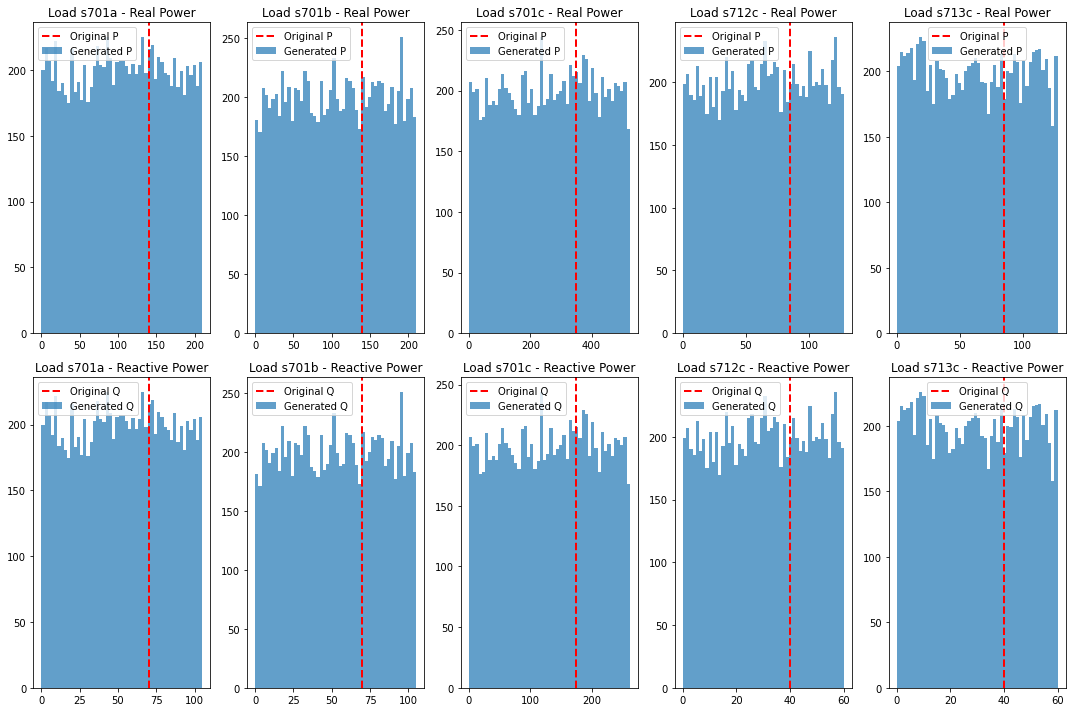

Scenarios saved to results


In [7]:
import numpy as np
from opendssdirect import dss
import os
import matplotlib.pyplot as plt

class LoadScenarioGeneration:
    def __init__(self, dss_file, output_dir="results"):
        self.dss_file = dss_file
        self.output_dir = output_dir
        self.load_data = []
        self.bus_names = []
        self.P_scenarios = {}
        self.Q_scenarios = {}
        os.makedirs(self.output_dir, exist_ok=True)
        
    def load_system(self):
        """Loads the DSS file and solves the power flow."""
        dss.run_command(f'Redirect "{self.dss_file}"')
        dss.Solution.Solve()
        
    def extract_load_data(self):
        """Extracts load data from the DSS file and stores it in a structured format."""
        loads = dss.Loads.AllNames()
        for load in loads:
            dss.Loads.Name(load)
            bus = dss.CktElement.BusNames()[0]
            phases = dss.Loads.Phases()
            conn = 'Delta' if dss.Loads.IsDelta() else 'Wye'
            P = dss.Loads.kW()
            Q = dss.Loads.kvar()
            kV = dss.Loads.kV()
            
            S = np.sqrt(P**2 + Q**2)  # Apparent power
            power_factor = P / S  # Power factor

            self.load_data.append({
                'name': load,
                'bus': bus,
                'phases': phases,
                'connection': conn,
                'P': P,
                'Q': Q,
                'kV': kV,
                'power_factor': power_factor
            })
        self.bus_names = dss.Circuit.AllBusNames()
        
    def generate_scenarios(self, n_scenarios=10000):
        """Generates random load scenarios based on a uniform distribution."""
        for load in self.load_data:
            P_base = load['P']
            power_factor = load['power_factor']
            
            self.P_scenarios[load['name']] = np.random.uniform(0, 1.5 * P_base, n_scenarios)
            self.Q_scenarios[load['name']] = self.P_scenarios[load['name']] * np.tan(np.arccos(power_factor))
    
    def save_scenarios(self, test_case):
        """Saves the generated load scenarios to the output directory."""
        np.save(os.path.join(self.output_dir, f"P_OpenDSS_uniform_{test_case}.npy"), self.P_scenarios)
        np.save(os.path.join(self.output_dir, f"Q_OpenDSS_uniform_{test_case}.npy"), self.Q_scenarios)
        # np.save(os.path.join(self.output_dir, f"load_data_{test_case}.npy"), self.load_data)
        print(f"Scenarios saved to {self.output_dir}")

    def plot_load_distributions(self, num_loads_to_plot=5):
        """Plots the distributions of the generated load scenarios."""
        plt.figure(figsize=(15, 10))
        for i, load in enumerate(self.load_data[:num_loads_to_plot]):
            name = load['name']
            P_base = load['P']
            Q_base = load['Q']
            
            plt.subplot(2, num_loads_to_plot, i + 1)
            plt.hist(self.P_scenarios[name], bins=50, alpha=0.7, label='Generated P')
            plt.axvline(P_base, color='r', linestyle='dashed', linewidth=2, label='Original P')
            plt.title(f'Load {name} - Real Power')
            plt.legend()

            plt.subplot(2, num_loads_to_plot, num_loads_to_plot + i + 1)
            plt.hist(self.Q_scenarios[name], bins=50, alpha=0.7, label='Generated Q')
            plt.axvline(Q_base, color='r', linestyle='dashed', linewidth=2, label='Original Q')
            plt.title(f'Load {name} - Reactive Power')
            plt.legend()

        plt.tight_layout()
        plt.show()
        
if __name__ == "__main__":
    # TestCase options
    # Uncomment the desired test case
    # test_case = '13Bus'
    # dss_file = "/Users/babaktaheri/Desktop/OLDF/Multi-phase/data/IEEETestCases/13Bus/IEEE13Nodeckt.dss"
    
    test_case = '37Bus'
    dss_file = "/Users/babaktaheri/Desktop/OLDF/Multi-phase/data/IEEETestCases/37Bus/ieee37.dss"

    simulator = LoadScenarioGeneration(dss_file=dss_file)
    simulator.load_system()
    simulator.extract_load_data()
    simulator.generate_scenarios()
    simulator.plot_load_distributions()
    simulator.save_scenarios(test_case)


# High Load

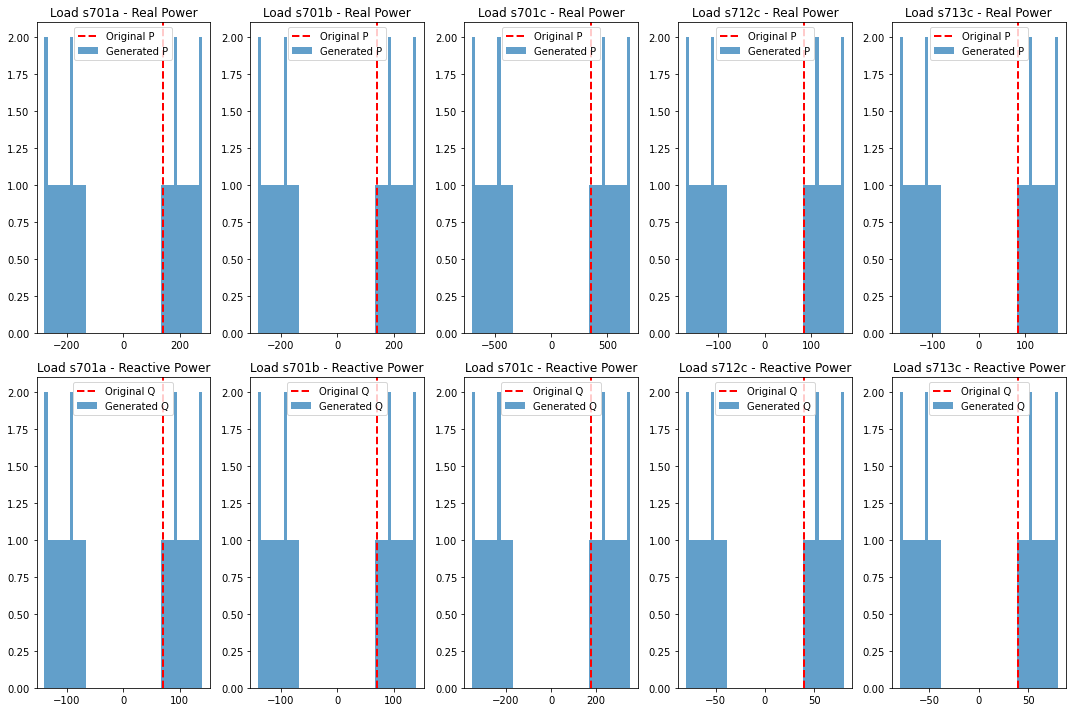

Scenarios saved to results


In [8]:
import numpy as np
from opendssdirect import dss
import os
import matplotlib.pyplot as plt

class LoadScenarioGeneration:
    def __init__(self, dss_file, output_dir="results"):
        self.dss_file = dss_file
        self.output_dir = output_dir
        self.load_data = []
        self.bus_names = []
        self.P_scenarios = {}
        self.Q_scenarios = {}
        os.makedirs(self.output_dir, exist_ok=True)
        
    def load_system(self):
        """Loads the DSS file and solves the power flow."""
        dss.run_command(f'Redirect "{self.dss_file}"')
        dss.Solution.Solve()
        
    def extract_load_data(self):
        """Extracts load data from the DSS file and stores it in a structured format."""
        loads = dss.Loads.AllNames()
        for load in loads:
            dss.Loads.Name(load)
            bus = dss.CktElement.BusNames()[0]
            phases = dss.Loads.Phases()
            conn = 'Delta' if dss.Loads.IsDelta() else 'Wye'
            P = dss.Loads.kW()
            Q = dss.Loads.kvar()
            kV = dss.Loads.kV()
            
            S = np.sqrt(P**2 + Q**2)  # Apparent power
            power_factor = P / S  # Power factor

            self.load_data.append({
                'name': load,
                'bus': bus,
                'phases': phases,
                'connection': conn,
                'P': P,
                'Q': Q,
                'kV': kV,
                'power_factor': power_factor
            })
        self.bus_names = dss.Circuit.AllBusNames()
        
    def generate_scenarios(self, N, k_values):
        """Generates load scenarios based on scaling factors."""
        for load in self.load_data:
            P_base = load['P']
            Q_base = load['Q']
            
            if P_base != 0:  # Skip zero loads
                self.P_scenarios[load['name']] = np.array([k * P_base for k in k_values[:N]])
                self.Q_scenarios[load['name']] = np.array([k * Q_base for k in k_values[:N]])
    
    def save_scenarios(self, test_case):
        """Saves the generated load scenarios to the output directory."""
        np.save(os.path.join(self.output_dir, f"P_high_load_{test_case}.npy"), self.P_scenarios)
        np.save(os.path.join(self.output_dir, f"Q_high_load_{test_case}.npy"), self.Q_scenarios)
        print(f"Scenarios saved to {self.output_dir}")

    def plot_load_distributions(self, num_loads_to_plot=5):
        """Plots the distributions of the generated load scenarios."""
        plt.figure(figsize=(15, 10))
        for i, load in enumerate(self.load_data[:num_loads_to_plot]):
            name = load['name']
            P_base = load['P']
            Q_base = load['Q']
            
            plt.subplot(2, num_loads_to_plot, i + 1)
            plt.hist(self.P_scenarios[name], bins=50, alpha=0.7, label='Generated P')
            plt.axvline(P_base, color='r', linestyle='dashed', linewidth=2, label='Original P')
            plt.title(f'Load {name} - Real Power')
            plt.legend()

            plt.subplot(2, num_loads_to_plot, num_loads_to_plot + i + 1)
            plt.hist(self.Q_scenarios[name], bins=50, alpha=0.7, label='Generated Q')
            plt.axvline(Q_base, color='r', linestyle='dashed', linewidth=2, label='Original Q')
            plt.title(f'Load {name} - Reactive Power')
            plt.legend()

        plt.tight_layout()
        plt.show()
        
if __name__ == "__main__":
    # TestCase options
    # Uncomment the desired test case
    # test_case = '13Bus'
    # dss_file = "/Users/babaktaheri/Desktop/OLDF/Multi-phase/data/IEEETestCases/13Bus/IEEE13Nodeckt.dss"
    
    test_case = '37Bus'
    dss_file = "/Users/babaktaheri/Desktop/OLDF/Multi-phase/data/IEEETestCases/37Bus/ieee37.dss"

    k_values_positive = np.linspace(1, 2, 15)
    k_values_negative = -np.flip(k_values_positive)
    k_values = np.concatenate((k_values_negative, k_values_positive))
    N = 30  # Number of scenarios

    simulator = LoadScenarioGeneration(dss_file=dss_file)
    simulator.load_system()
    simulator.extract_load_data()
    simulator.generate_scenarios(N, k_values)
    simulator.plot_load_distributions()
    simulator.save_scenarios(test_case)
